# Rice Disease are classified using CNN with Tensorflow

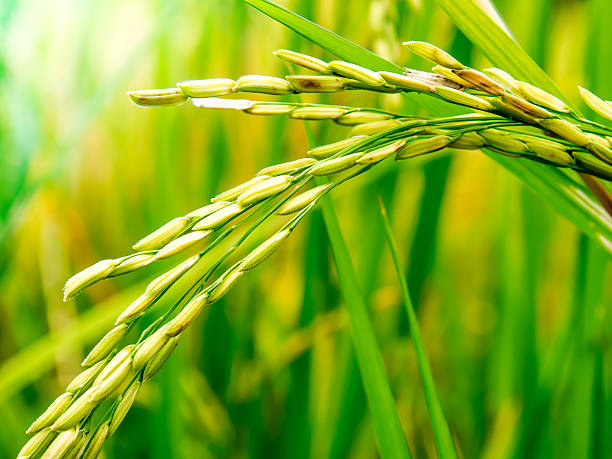

# 1. Import Libraries:

In [1]:
# import libraies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf

2024-02-01 13:47:31.210557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 13:47:31.210703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 13:47:31.368319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Load the Dataset:

In [2]:
# import train.csv file
data = pd.read_csv("/kaggle/input/paddy-disease-classification/train.csv")
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


# 3. Data Analysis:

In [3]:
# check the shape of data
data.shape

(10407, 4)

In [4]:
data['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [5]:
data['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [6]:
data['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

# 4. Plots:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


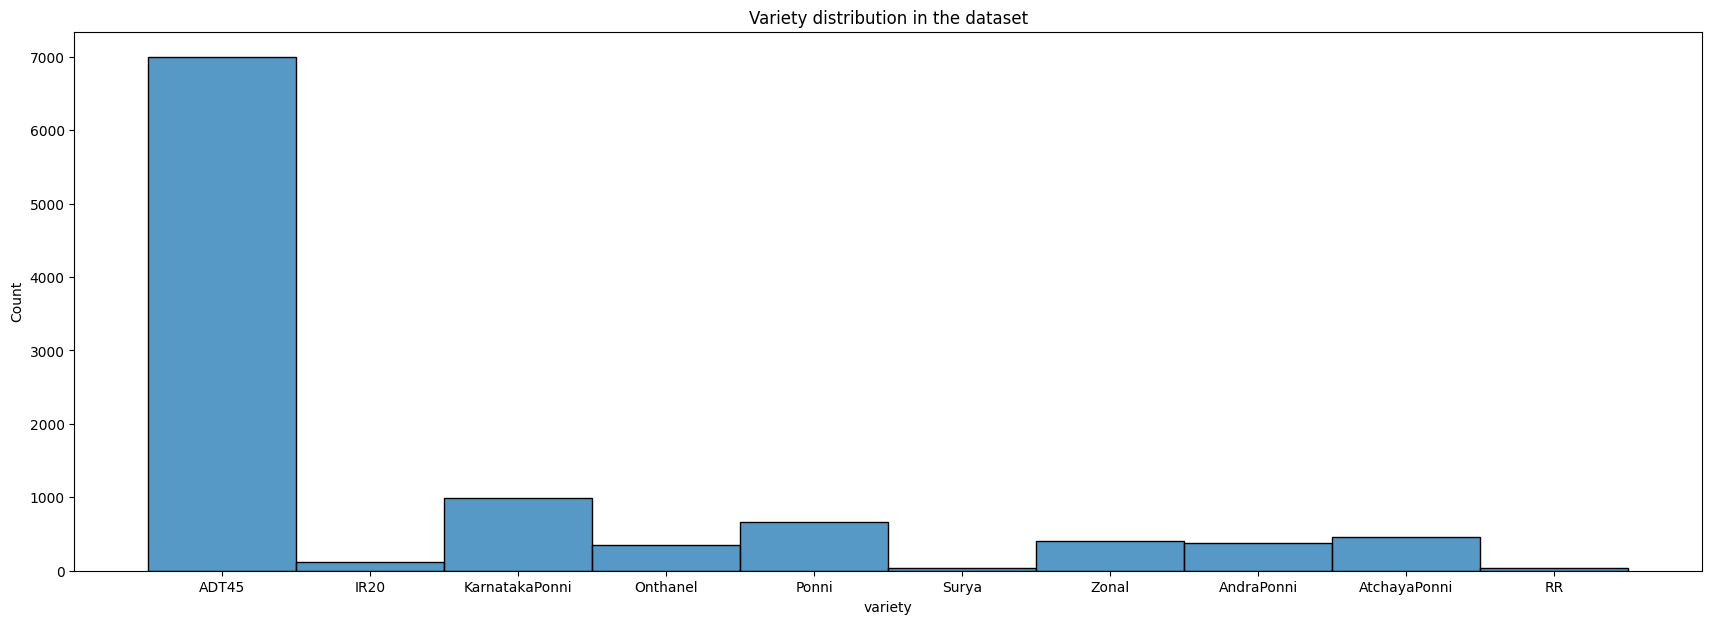

In [7]:
# plot the data count based on variety name 
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(data, x='variety', ax=axes)
plt.title("Variety distribution in the dataset")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


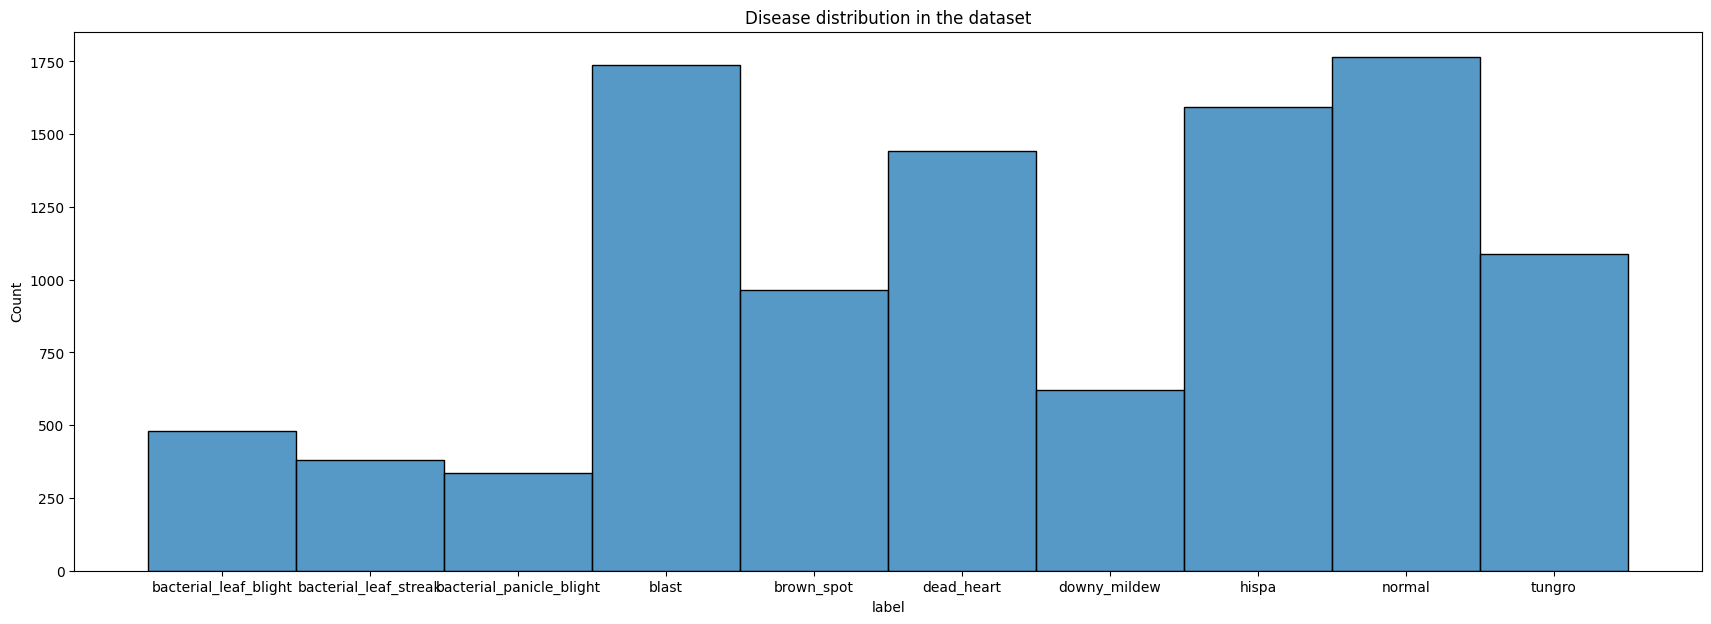

In [8]:
# plot the data count based on variety name 
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(data, x='label', ax=axes)
plt.title("Disease distribution in the dataset")
plt.show()

In [9]:
normal = data[data['label'] == 'normal']
normal = normal[normal['variety'] == 'ADT45']
five_normals = normal.image_id[:5].values
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [10]:
dead = data[data['label'] == 'dead_heart']
dead = dead[dead['variety'] == 'ADT45']
five_deads = dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

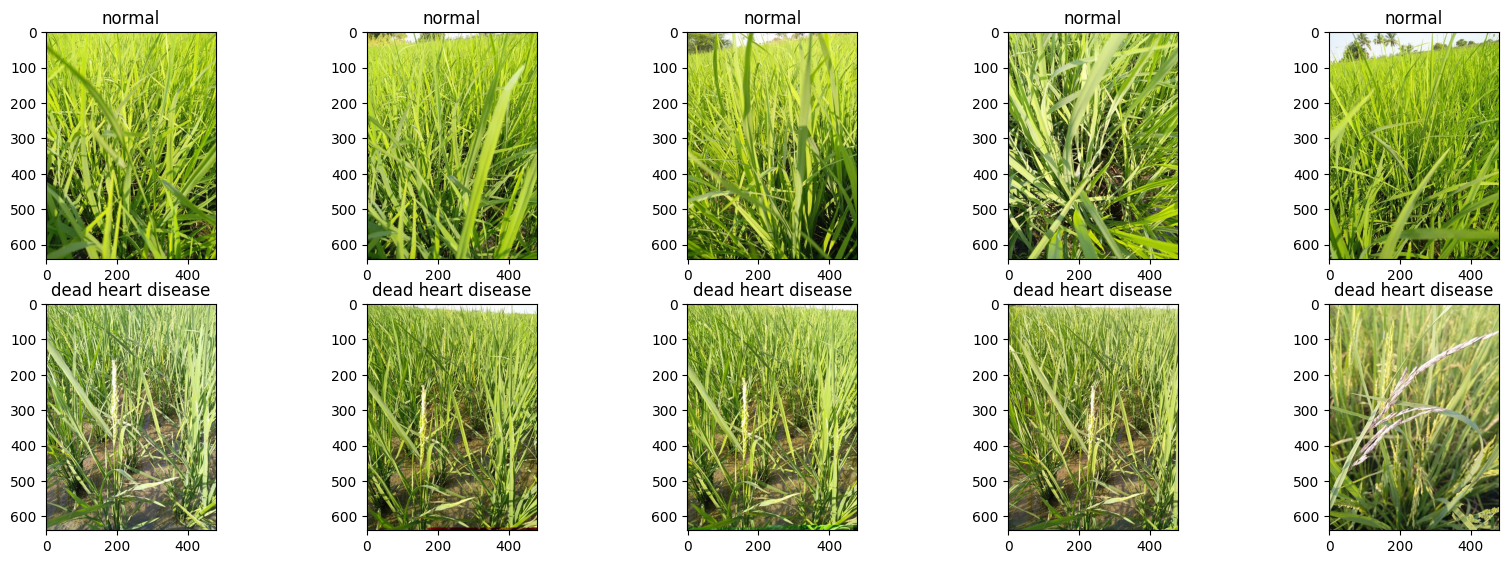

In [11]:
# make plot of images just to have an idea
plt.figure(figsize=(20,10))
columns = 5
path = '/kaggle/input/paddy-disease-classification/train_images/'
for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10//columns + 1, columns, i + 1)
    
    if i < 5:
        image=plt.imread(path +"normal/"+ image_loc)
        plt.title("normal")
    else:
        plt.title("dead heart disease")
        image=plt.imread(path +"dead_heart/"+ image_loc)
        
    plt.imshow(image)

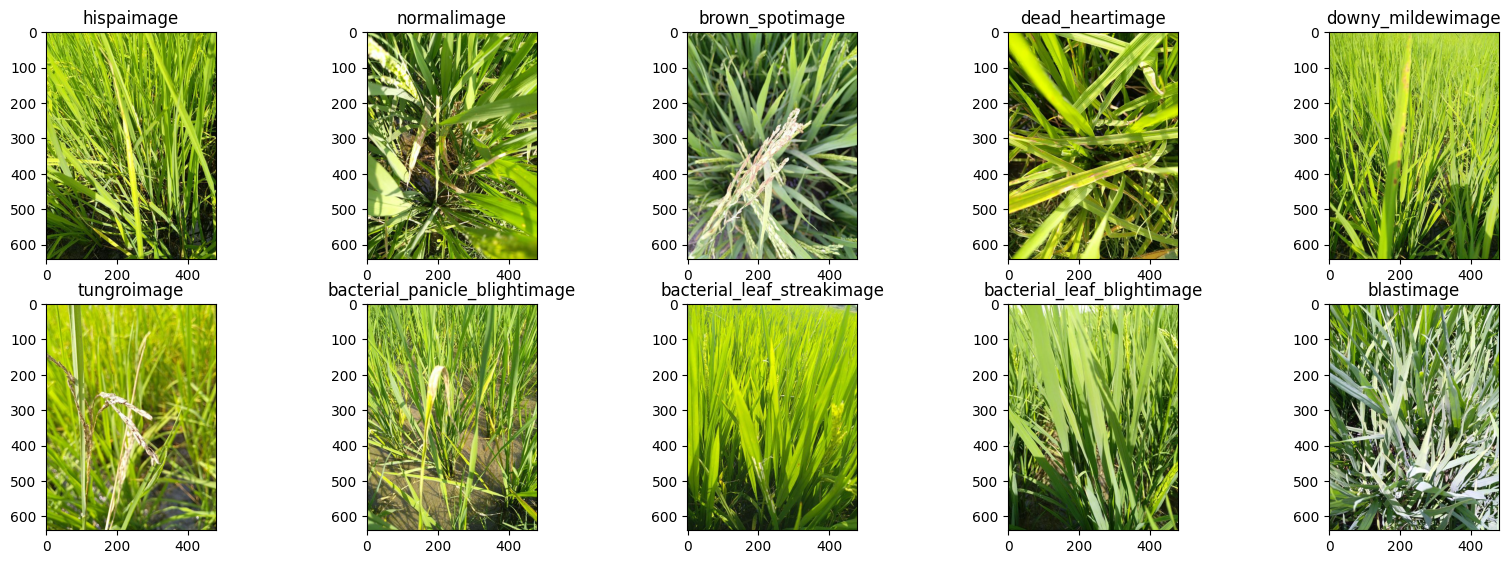

In [12]:
images = ['/kaggle/input/paddy-disease-classification/train_images/bacterial_leaf_blight/109372.jpg',\
          '/kaggle/input/paddy-disease-classification/train_images/bacterial_leaf_streak/101104.jpg',\
          '/kaggle/input/paddy-disease-classification/train_images/bacterial_panicle_blight/101351.jpg',\
          '/kaggle/input/paddy-disease-classification/train_images/blast/110243.jpg',\
          '/kaggle/input/paddy-disease-classification/train_images/brown_spot/104675.jpg',\
          '/kaggle/input/paddy-disease-classification/train_images/dead_heart/105159.jpg',\
          '/kaggle/input/paddy-disease-classification/train_images/downy_mildew/102350.jpg',\
          '/kaggle/input/paddy-disease-classification/train_images/hispa/106590.jpg',\
          '/kaggle/input/paddy-disease-classification/train_images/normal/109760.jpg',\
          '/kaggle/input/paddy-disease-classification/train_images/tungro/109629.jpg',\
]
diseases =['hispa', 'normal','brown_spot', 'dead_heart', 'downy_mildew', 'tungro', 'bacterial_panicle_blight',
          'bacterial_leaf_streak', 'bacterial_leaf_blight', 'blast']
diseases = [disease + 'image' for disease in diseases]
# Plot settings
plt.figure(figsize=(20, 10))
columns = 5

# Plotting each image with its title
for i, image_loc in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    image = plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

In [13]:
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [14]:
# encode both columns label and veriety
from sklearn. preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label'] = LabelEncoder().fit_transform(data['label'])
data['variety'] = LabelEncoder().fit_transform(data['variety'])

data.head()                                               

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


In [15]:
# define perameter
batch_size = 16
img_height = 224
img_width = 224

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path, 
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path, 
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [18]:
class_names =train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [19]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 224, 224, 3)
(16,)


In [20]:
# remove warnings
import warnings 
warnings.filterwarnings("ignore")

normalization_layer = tf.keras.layers.Rescaling(1./255)

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
num_classes = len(class_names)
num_classes

10

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [25]:
# remove warnings
import warnings 
warnings.filterwarnings("ignore")

model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Epoch 1/10
521/521 [==============================] - 384s 733ms/step - loss: 1.8280 - accuracy: 0.3640 - val_loss: 1.4466 - val_accuracy: 0.5257
Epoch 2/10
521/521 [==============================] - 362s 694ms/step - loss: 1.1451 - accuracy: 0.6268 - val_loss: 1.0677 - val_accuracy: 0.6843
Epoch 3/10
521/521 [==============================] - 362s 695ms/step - loss: 0.6310 - accuracy: 0.7931 - val_loss: 1.2144 - val_accuracy: 0.6780
Epoch 4/10
521/521 [==============================] - 361s 692ms/step - loss: 0.3467 - accuracy: 0.8879 - val_loss: 1.1601 - val_accuracy: 0.7395
Epoch 5/10
521/521 [==============================] - 363s 697ms/step - loss: 0.2080 - accuracy: 0.9327 - val_loss: 1.0617 - val_accuracy: 0.7593
Epoch 6/10
521/521 [==============================] - 365s 700ms/step - loss: 0.1542 - accuracy: 0.9508 - val_loss: 1.2490 - val_accuracy: 0.7727
Epoch 7/10
521/521 [==============================] - 359s 689ms/step - loss: 0.1187 - accuracy: 0.9636 - val_loss: 1.2860 -

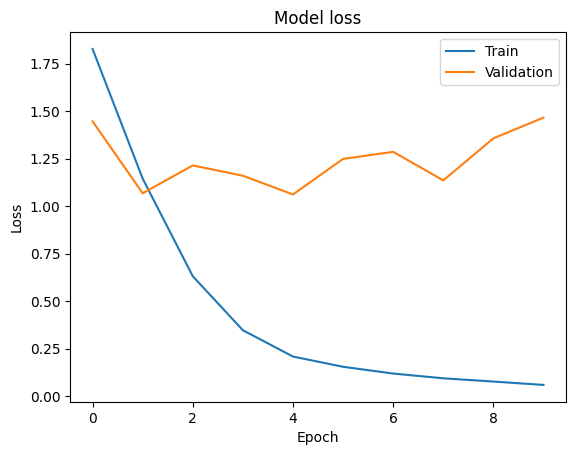

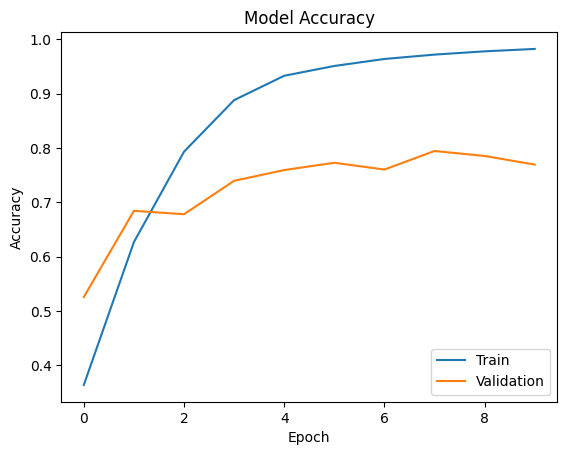

CPU times: user 3h 14min 35s, sys: 29min 20s, total: 3h 43min 55s
Wall time: 1h 3min 46s


In [26]:
%%time
# remove warnings
import warnings 
warnings.filterwarnings("ignore")

from tensorflow.keras.callbacks import EarlyStopping

# Define the callback function
early_stopping = EarlyStopping(patience=10)

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=10, 
          callbacks=[early_stopping])

# evaluate the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## Observations:

1. We have 10407, images in train data.
2. We have 10 uniques disease classes.
3. We also have 10 variesites of RICE in this data.
4. We have rice plant age ranging from 45 - 85 days.
5. ADT45 the most common variety inside the training data.